<a href="https://www.kaggle.com/code/ambrustorok/digit-recognizer?scriptVersionId=161441393" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Setup

# Read data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
X = np.reshape(df.loc[:, df.columns != 'label'].to_numpy(), (len(df), 28, 28))
y = df['label'].to_numpy()

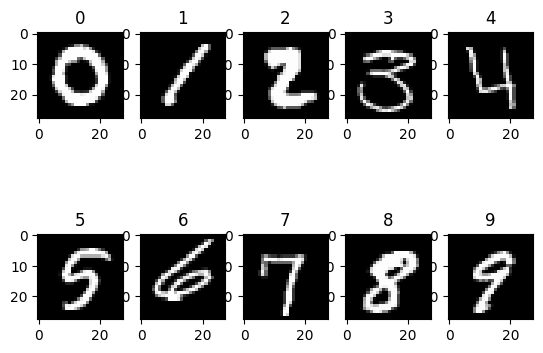

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=5)

for i in range(2):
    for j in range(5):
        num = i*5+j
        idx = np.where(y == num)[0][0]
        axes[i, j].imshow(X[idx], cmap='gray')
        axes[i, j].set_title(num)
plt.show()

# Train model

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (33600, 28, 28)
Training labels shape: (33600,)
Test data shape: (8400, 28, 28)
Test labels shape: (8400,)


In [5]:
import tensorflow as tf

# Normalize pixel values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to add a channel dimension
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/8
1050/1050 [==============================] - 20s 18ms/step - loss: 0.1915 - accuracy: 0.9413 - val_loss: 0.0672 - val_accuracy: 0.9796
Epoch 2/8
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0590 - accuracy: 0.9814 - val_loss: 0.0572 - val_accuracy: 0.9824
Epoch 3/8
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0402 - accuracy: 0.9873 - val_loss: 0.0453 - val_accuracy: 0.9867
Epoch 4/8
1050/1050 [==============================] - 18s 18ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0415 - val_accuracy: 0.9865
Epoch 5/8
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0446 - val_accuracy: 0.9854
Epoch 6/8
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.0357 - val_accuracy: 0.9895
Epoch 7/8
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0165 - accuracy: 0.9940 - val_loss: 0.0423 - val_ac

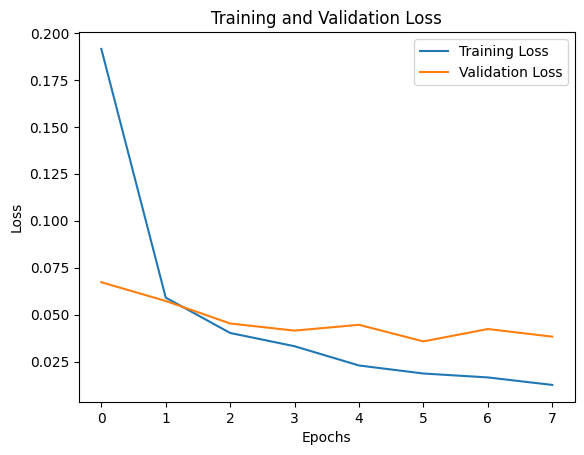

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

263/263 [==============================] - 2s 6ms/step - loss: 0.0383 - accuracy: 0.9893
Test Loss: 0.038254283368587494, Test Accuracy: 0.9892857074737549


# Create submission

In [11]:
submission = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
submission

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
submission_data = np.reshape(submission.to_numpy(), (len(submission), 28, 28))
submission_data = submission_data / 255.0
submission_data = np.expand_dims(submission_data, axis=-1)

In [13]:
predictions = model.predict(submission_data)
predictions

875/875 [==============================] - 5s 5ms/step


array([[8.2320843e-12, 1.0323812e-11, 9.9999982e-01, ..., 1.2158990e-08,
        7.4274653e-10, 1.7041276e-13],
       [9.9998862e-01, 3.1915845e-10, 5.3631629e-06, ..., 5.2427809e-09,
        5.2305875e-08, 3.6334163e-06],
       [1.7619135e-10, 7.0378445e-09, 2.7387420e-08, ..., 3.2433896e-09,
        1.8827820e-06, 9.9996871e-01],
       ...,
       [3.8590540e-22, 1.7625092e-14, 3.4655921e-19, ..., 1.1185689e-13,
        3.4325190e-13, 1.3912517e-15],
       [3.4249645e-09, 9.5224184e-10, 1.0115645e-09, ..., 2.2616788e-07,
        1.8005292e-06, 9.9989837e-01],
       [7.9462787e-16, 2.2776231e-13, 9.9999994e-01, ..., 7.8541366e-12,
        9.4704161e-11, 1.9308887e-14]], dtype=float32)

In [14]:
np.argmax(predictions, axis=1)

array([2, 0, 9, ..., 3, 9, 2])

In [15]:
predictions.shape

(28000, 10)

In [16]:
submit = pd.DataFrame(data={"ImageId": range(1,28001),"Label":np.argmax(predictions, axis=1)})
submit.to_csv("/kaggle/working/submission.csv", index=False)